# **Brief Description:**

## Project done by **Albert Sayapin** and **Sergei Nikodimov** (IDS 2021)

## Grading details:

1. Describe the *problem* you want to solve. *Why* is it *important*? *Why* do we want to use *Machine Learning*? (Task 1)
2. *Load* the data using pandas and *split* the data frame into X (*inputs*) and y (*outputs*). (Task 2)
3. *Prepare* your *dataset*:
   1. encode categorical variables(if any); Explain. (Task 3.1)
   2. handle missing variables (if any); Explain. (Task 3.2)
   3. generate new features (if useful); Explain. (Task 3.3)
   4. preprocess target (if needed); Explain. (Task 3.4)
4. Perform EDA via visualization with Seaborn:
   1. try to find patterns to make ML task more specific / to help with selection and tuning ML models. (Task 4.1)
   2. preprocess your data if your findings suggest this; Explain. (Task 4.2)
   3. after you can select tagret changes; Explain. (Task 4.3)
5. Training:
   1. build a proper cross-validation procedure; Explain. (Task 5.1)
   2. select an appropriate measure of quality; Explain. (Task 5.2)
   3. choose an ML model; Explain. (Task 5.3) 
   4. look for a good set of hyperparameters. (Task 5.4)
   5. use the prepared cv procedure to estimate the quality of prediction. (Task 5.5)
6. Analyze the obtained results and make final conclusion:
   1. interesting findings, remarks on ML experiments; (Task 6.1)
   2. the applicability of the model in a real-life scenario; (Task 6.2)
   3. does your model solve the problem stated at the beginning? (Task 6.3)
   4. Can you estimate the impact of your ML model on the problem domain (Task 6.4)


## <u>Task 1. ANSWER HERE.</u>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')

# **Work with the data:**

## *Load the data:*

## <u>Task 2. Look at one Cell below.</u>

In [2]:
train_data = pd.read_csv("training_set_features.csv", index_col=0)
train_target = pd.read_csv("training_set_labels.csv", index_col=0)

## *Look at the data and deal with missing values:*

### Features:

In [3]:
train_data.shape

(26707, 35)

In [4]:
train_data.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [6]:
common_cols = [
    'behavioral_antiviral_meds',
    'behavioral_avoidance', 'behavioral_face_mask',
    'behavioral_wash_hands', 'behavioral_large_gatherings',
    'behavioral_outside_home', 'behavioral_touch_face',
    'chronic_med_condition', 'child_under_6_months',
    'health_worker', 'health_insurance',
    'age_group', 'education', 'race', 'sex', 'income_poverty',
    'marital_status', 'rent_or_own', 'employment_status',
    'hhs_geo_region', 'census_msa', 'household_adults',
    'household_children', 'employment_industry', 'employment_occupation',
]
    
seasonal_cols = [
    'doctor_recc_seasonal', 'opinion_seas_vacc_effective',
    'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
]

h1n1_cols = [
    'h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
    'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
]

assert len(common_cols) + len(seasonal_cols) + len(h1n1_cols) == len(train_data.columns)

In [8]:
train_data.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

In [9]:
train_data.select_dtypes(include="float64").describe().T

,count,mean,std,min,25%,50%,75%,max
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0
doctor_recc_h1n1,24547.0,0.220312,0.414466,0.0,0.0,0.0,0.0,1.0


## <u>Task (3.2). Look at one Cell below.</u>

In [10]:
# Fill in Nans in float columns with median values because it is the best approximation
# when you work with descrete variables and do not want to lose information dropping rows:

float_cols = train_data.select_dtypes(include="float64").columns
float_medians = train_data[float_cols].median()

train_data[float_cols] = train_data[float_cols].fillna(float_medians)

In [11]:
train_data.select_dtypes(include="object").describe().T

,count,unique,top,freq
age_group,26707,5,65+ Years,6843
education,25300,4,College Graduate,10097
race,26707,4,White,21222
sex,26707,2,Female,15858
income_poverty,22284,3,"<= $75,000, Above Poverty",12777
marital_status,25299,2,Married,13555
rent_or_own,24665,2,Own,18736
employment_status,25244,3,Employed,13560
hhs_geo_region,26707,10,lzgpxyit,4297
census_msa,26707,3,"MSA, Not Principle City",11645


In [12]:
def bar_plot_value_counts(df, column, title):
    """
        Helper function to plot some results
    """

    df[column].value_counts().plot(kind='bar')
    plt.xticks(rotation=45)
    plt.title(title)

### <u>"age_group":</u>
### We have all the data, hence we will make it dummy_vals.

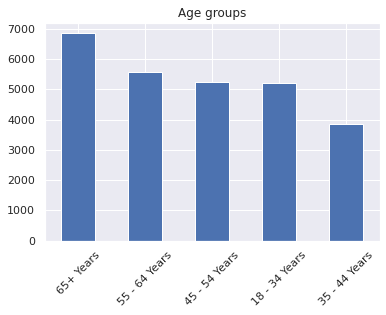

In [44]:
bar_plot_value_counts(train_data, "age_group", "Age groups")

### <u>"education":</u>
### We need to fill in NaNs in some way.

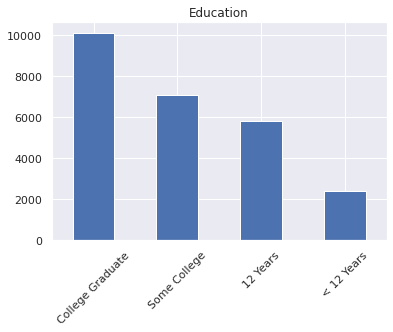

In [45]:
bar_plot_value_counts(train_data, "education", "Education")

In [46]:
train_data.groupby("age_group").apply(lambda x: x["education"].value_counts().idxmax())

age_group
18 - 34 Years    College Graduate
35 - 44 Years    College Graduate
45 - 54 Years    College Graduate
55 - 64 Years    College Graduate
65+ Years        College Graduate
dtype: object

## <u>Task (3.2). Look at one Cell below.</u>

In [47]:
# We will map Nans to one of the educational classes based on age_group
# because there is correlation between education level and age;
# and it is better than to drop rows or fill Nans with one predefined value

age_group2education = (
    train_data.groupby("age_group")
    .apply(lambda x: x["education"].value_counts().idxmax())
)

mask = train_data["education"].isna()
train_data["education"][mask] = train_data["age_group"][mask].apply(lambda x: age_group2education[x])

### "race" and "sex":
### We have all the data, hence we will make it dummy_vals:

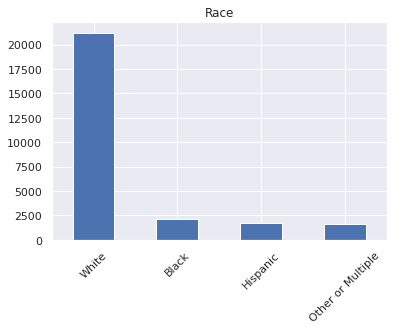

In [48]:
bar_plot_value_counts(train_data, "race", "Race")

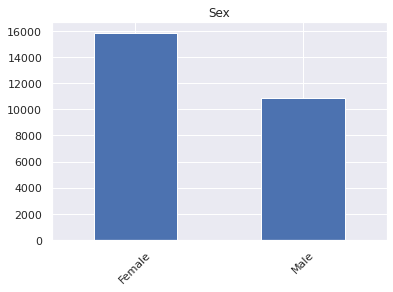

In [49]:
bar_plot_value_counts(train_data, "sex", "Sex")

### "income_poverty":
### We need to fill in NaNs in some way.

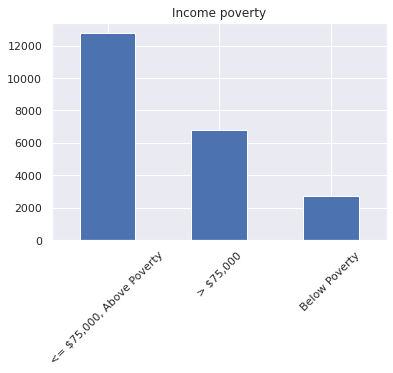

In [50]:
bar_plot_value_counts(train_data, "income_poverty", "Income poverty")

In [51]:
train_data.groupby("education").apply(lambda x: x["income_poverty"].value_counts().idxmax())

education
12 Years            <= $75,000, Above Poverty
< 12 Years          <= $75,000, Above Poverty
College Graduate                    > $75,000
Some College        <= $75,000, Above Poverty
dtype: object

## <u>Task (3.2). Look at one Cell below.</u>

In [52]:
# We will map Nans to one of the income classes based on education
# because there is correlation between education level and income;
# and it is better than to drop rows or fill Nans with one predefined value

education2income = (
    train_data.groupby("education")
    .apply(lambda x: x["income_poverty"].value_counts().idxmax())
)

mask = train_data["income_poverty"].isna()
train_data["income_poverty"][mask] = train_data["education"][mask].apply(lambda x: education2income[x])

### "marital_status":
### We need to fill in NaNs in some way.

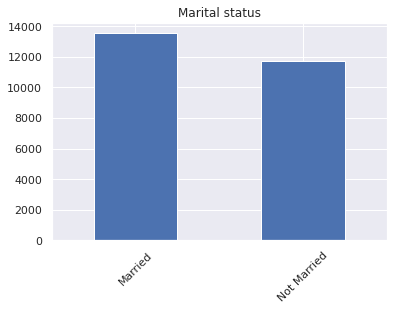

In [53]:
bar_plot_value_counts(train_data, "marital_status", "Marital status")

In [54]:
(
    train_data.groupby(["age_group"])
    .apply(lambda x: x["marital_status"].value_counts().idxmax())
)

age_group
18 - 34 Years    Not Married
35 - 44 Years        Married
45 - 54 Years        Married
55 - 64 Years        Married
65+ Years        Not Married
dtype: object

## <u>Task (3.2). Look at one Cell below.</u>

In [55]:
# We will map Nans to one of the marital statuses based on age group
# because there is correlation between marital status and age;
# and it is better than to drop rows or fill Nans with one predefined value

age_group2marital_stat = (
    train_data.groupby(["age_group"])
    .apply(lambda x: x["marital_status"].value_counts().idxmax())
)

mask = train_data["marital_status"].isna()
train_data["marital_status"][mask] = train_data["age_group"][mask].apply(lambda x: age_group2marital_stat[x])

### "rent_or_own":
### We need to fill in NaNs in some way.

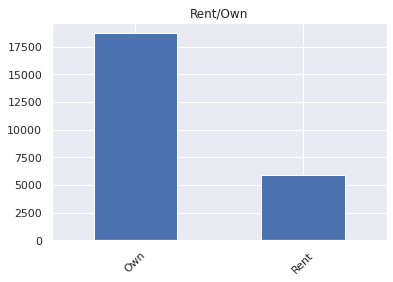

In [56]:
bar_plot_value_counts(train_data, "rent_or_own", "Rent/Own")

In [57]:
(
    train_data.groupby(["age_group"])
    .apply(lambda x: x["rent_or_own"].value_counts().idxmax())
)

age_group
18 - 34 Years    Own
35 - 44 Years    Own
45 - 54 Years    Own
55 - 64 Years    Own
65+ Years        Own
dtype: object

## <u>Task (3.2). Look at one Cell below.</u>

In [58]:
# We will map Nans to one of the rent statuses based on age group
# because there is correlation between possibility to rent/own and age;
# and it is better than to drop rows or fill Nans with one predefined value

age_group2rent_own = (
    train_data.groupby(["age_group"])
    .apply(lambda x: x["rent_or_own"].value_counts().idxmax())
)

mask = train_data["rent_or_own"].isna()
train_data["rent_or_own"][mask] = train_data["age_group"][mask].apply(lambda x: age_group2rent_own[x])

### "employment_status":
### We need to fill in NaNs in some way.

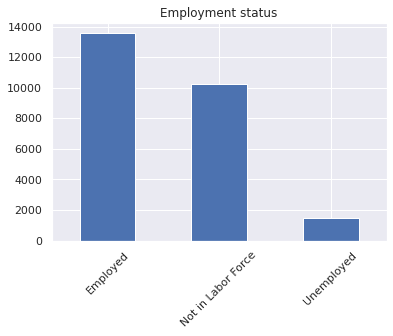

In [59]:
bar_plot_value_counts(train_data, "employment_status", "Employment status")

In [60]:
(
    train_data.groupby(["age_group"])
    .apply(lambda x: x["employment_status"].value_counts().idxmax())
)

age_group
18 - 34 Years              Employed
35 - 44 Years              Employed
45 - 54 Years              Employed
55 - 64 Years              Employed
65+ Years        Not in Labor Force
dtype: object

## <u>Task (3.2). Look at one Cell below.</u>

In [61]:
# We will map Nans to one of the employment statuses based on age group
# because there is correlation between employment status  and age;
# and it is better than to drop rows or fill Nans with one predefined value


age_group2emp_stat = (
    train_data.groupby(["age_group"])
    .apply(lambda x: x["employment_status"].value_counts().idxmax())
)

mask = train_data["employment_status"].isna()
train_data["employment_status"][mask] = train_data["age_group"][mask].apply(lambda x: age_group2emp_stat[x])

### "employment_industry" and "employment_occupation":
### Just waste, we will drop them.

In [62]:
train_data["employment_industry"].value_counts().head(3)

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
Name: employment_industry, dtype: int64

In [63]:
train_data["employment_occupation"].value_counts().head(3)

xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
Name: employment_occupation, dtype: int64

In [64]:
train_data["hhs_geo_region"].value_counts().head(3)

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
Name: hhs_geo_region, dtype: int64

In [65]:
train_data = train_data.drop(columns=["employment_industry", "employment_occupation", "hhs_geo_region"])

In [66]:
train_data.count().min()

26707

### Labels:

In [67]:
train_target.describe().T

,count,mean,std,min,25%,50%,75%,max
h1n1_vaccine,26707.0,0.212454,0.409052,0.0,0.0,0.0,0.0,1.0
seasonal_vaccine,26707.0,0.465608,0.498825,0.0,0.0,0.0,1.0,1.0


## <u>Task (3.4). Look at one Cell below.</u>

In [68]:
# We divide multilabel target into 2 distinct targets to be able to experiment simultaneously.
# Besides we think that it would help us to find more accurate model as a combination of 2 separate ones

train_target = train_target["seasonal_vaccine"]
train_target_h1n1 = train_target["h1n1_vaccine"]

## *Create some features:*

### dummy features:

## <u>Task (3.1). Look at the next 2 Cells below.</u>

In [69]:
dummy_cols = train_data.select_dtypes(include="object").columns.tolist()
train_data[dummy_cols].nunique().sum()

28

In [70]:
train_data = pd.concat([train_data, pd.get_dummies(train_data[dummy_cols])], axis=1)
train_data = train_data.drop(columns=dummy_cols)

### custom features:

## <u>Task (3.3). Look at the next 2 Cells below.</u>

# **Make baselines:**

### split the data on train and test:

In [71]:
x_train, x_test, y_train, y_test = train_test_split(
    train_data, train_target, test_size=0.3,
    random_state=42, shuffle=True,
    stratify=train_target,
)

x_test.shape[0]/train_data.shape[0]

0.3000336990302168

### Logistic Regression:

In [72]:
estimators = [
    ('reduce_dim', PCA()),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=5000, random_state=42)),
]

param_grid = {
    'reduce_dim__n_components': [i for i in range(5, 50)],
    'lr__C': [
        0.001, 0.005, 0.01, 0.05, 0.1, 0.15,
        0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1
    ],
}

pipe = Pipeline(steps=estimators)
clf = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
clf.fit(x_train, y_train)
print("Best parameter (CV score=%0.3f):" % clf.best_score_)
print(clf.best_params_)

clf.best_estimator_.fit(x_train, y_train)
pred = clf.best_estimator_.predict_proba(x_test)
print(f"Final roc_auc_score = {roc_auc_score(y_test, pred[:, 1])}")


Fitting 5 folds for each of 675 candidates, totalling 3375 fits


### K-Nearest Neighbours:

In [ ]:
estimators = [
    ('reduce_dim', PCA()),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier()),
]

param_grid = {
    'reduce_dim__n_components': [10, 20, 30, 40, 50],
    'knn__n_neighbors': [5, 10, 20, 30],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2, 3],
}

pipe = Pipeline(steps=estimators)
clf = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
clf.fit(x_train, y_train)
print("Best parameter (CV score=%0.3f):" % clf.best_score_)
print(clf.best_params_)

clf.best_estimator_.fit(x_train, y_train)
pred = clf.best_estimator_.predict_proba(x_test)
print(f"Final roc_auc_score = {roc_auc_score(y_test, pred[:, 1])}")

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameter (CV score=0.809):
{'knn__n_neighbors': 30, 'knn__p': 2, 'knn__weights': 'uniform', 'reduce_dim__n_components': 20}
Final roc_auc_score = 0.8076243626277232


### Decision Tree:

In [ ]:
estimators = [
    ('reduce_dim', PCA()),
    ('scaler', StandardScaler()),
    ('dtc', DecisionTreeClassifier(random_state=42)),
]

param_grid = {
    'reduce_dim__n_components': [20, 30, 40, 50],
    'dtc__max_depth': [5, 10, 20, 30],
    'dtc__max_features': ['auto', 20],
}

pipe = Pipeline(steps=estimators)
clf = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
clf.fit(x_train, y_train)
print("Best parameter (CV score=%0.3f):" % clf.best_score_)
print(clf.best_params_)

clf.best_estimator_.fit(x_train, y_train)
pred = clf.best_estimator_.predict_proba(x_test)
print(f"Final roc_auc_score = {roc_auc_score(y_test, pred[:, 1])}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameter (CV score=0.776):
{'dtc__max_depth': 5, 'dtc__max_features': 20, 'reduce_dim__n_components': 40}
Final roc_auc_score = 0.7679121780464896


### C-Support Vector Classification

In [ ]:
estimators = [
    ('reduce_dim', PCA()),
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, gamma='auto', random_state=42)),
]

param_grid = {
    'reduce_dim__n_components': [20, 30],
    'svc__C': [
        0.001, 0.005, 0.01, 0.05, 0.1, 0.15,
    ],
}

pipe = Pipeline(steps=estimators)
clf = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
clf.fit(x_train, y_train)
print("Best parameter (CV score=%0.3f):" % clf.best_score_)
print(clf.best_params_)

clf.best_estimator_.fit(x_train, y_train)
pred = clf.best_estimator_.predict_proba(x_test)
print(f"Final roc_auc_score = {roc_auc_score(y_test, pred[:, 1])}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameter (CV score=0.843):
{'reduce_dim__n_components': 30, 'svc__C': 0.15}


AttributeError: predict_proba is not available when  probability=False

### Random Forest:

In [ ]:
estimators = [
    ('reduce_dim', PCA()),
    ('scaler', StandardScaler()),
    ('rfc', RandomForestClassifier(random_state=42)),
]

param_grid = {
    'reduce_dim__n_components': [20, 30, 40],
    'rfc__n_estimators': [500, 550],
    'rfc__max_depth': [9, 10],
}

pipe = Pipeline(steps=estimators)
clf = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
clf.fit(x_train, y_train)
print("Best parameter (CV score=%0.3f):" % clf.best_score_)
print(clf.best_params_)

clf.best_estimator_.fit(x_train, y_train)
pred = clf.best_estimator_.predict_proba(x_test)
print(f"Final roc_auc_score = {roc_auc_score(y_test, pred[:, 1])}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameter (CV score=0.841):
{'reduce_dim__n_components': 40, 'rfc__max_depth': 10, 'rfc__n_estimators': 550}
Final roc_auc_score = 0.8374709613872987


### Gaussian Naive Bayes:

In [ ]:
estimators = [
    ('reduce_dim', PCA()),
    ('scaler', StandardScaler()),
    ('gnb', GaussianNB()),
]

param_grid = {
    'reduce_dim__n_components': [20, 30, 40],
}

pipe = Pipeline(steps=estimators)
clf = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
clf.fit(x_train, y_train)
print("Best parameter (CV score=%0.3f):" % clf.best_score_)
print(clf.best_params_)

clf.best_estimator_.fit(x_train, y_train)
pred = clf.best_estimator_.predict_proba(x_test)
print(f"Final roc_auc_score = {roc_auc_score(y_test, pred[:, 1])}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameter (CV score=0.819):
{'reduce_dim__n_components': 20}
Final roc_auc_score = 0.8123746020785243


### MLP Classifier:

In [ ]:
estimators = [
    ('reduce_dim', PCA()),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=600, random_state=42)),
]

param_grid = {
    'reduce_dim__n_components': [20, 30, 40],
    'mlp__hidden_layer_sizes': [(100, 50), (150, 100)],
    'mlp__alpha': [1e-4, 2e-4],
}

pipe = Pipeline(steps=estimators)
clf = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
clf.fit(x_train, y_train)
print("Best parameter (CV score=%0.3f):" % clf.best_score_)
print(clf.best_params_)

clf.best_estimator_.fit(x_train, y_train)
pred = clf.best_estimator_.predict_proba(x_test)
print(f"Final roc_auc_score = {roc_auc_score(y_test, pred[:, 1])}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/albert/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameter (CV score=0.774):
{'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (150, 100), 'reduce_dim__n_components': 40}
Final roc_auc_score = 0.7672010551733954
